In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
% matplotlib inline

In [7]:
# read 'stock_px' data
stock_df = pd.read_csv('pydata-book/ch11/stock_px.csv',parse_dates=True,index_col=0)
print(stock_df.head())
print(stock_df.info())

              AA  AAPL    GE    IBM   JNJ  MSFT   PEP     SPX   XOM
1990-02-01  4.98  7.86  2.87  16.79  4.27  0.51  6.04  328.79  6.12
1990-02-02  5.04  8.00  2.87  16.89  4.37  0.51  6.09  330.92  6.24
1990-02-05  5.07  8.18  2.87  17.32  4.34  0.51  6.05  331.85  6.25
1990-02-06  5.01  8.12  2.88  17.56  4.32  0.51  6.15  329.66  6.23
1990-02-07  5.04  7.77  2.91  17.93  4.38  0.51  6.17  333.75  6.33
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 9 columns):
AA      5472 non-null float64
AAPL    5472 non-null float64
GE      5472 non-null float64
IBM     5472 non-null float64
JNJ     5472 non-null float64
MSFT    5472 non-null float64
PEP     5471 non-null float64
SPX     5472 non-null float64
XOM     5472 non-null float64
dtypes: float64(9)
memory usage: 427.5 KB
None


In [11]:
# read 'volume' data
volume_df = pd.read_csv('pydata-book/ch11/volume.csv',parse_dates=True,index_col=0)
print(volume_df.head())
print(volume_df.info())

                   AA        AAPL          GE         IBM        JNJ  \
1990-02-01  2185600.0   4193200.0  14457600.0   6903600.0  5942400.0   
1990-02-02  3103200.0   4248800.0  15302400.0   6064400.0  4732800.0   
1990-02-05  1792800.0   3653200.0   9134400.0   5299200.0  3950400.0   
1990-02-06  2205600.0   2640000.0  14389200.0  10808000.0  3761600.0   
1990-02-07  3592800.0  11180800.0  18704400.0  12057600.0  5458400.0   

                   MSFT        PEP          SPX        XOM  
1990-02-01   89193600.0  2954400.0  154580000.0  2916400.0  
1990-02-02   71395200.0  2424000.0  164400000.0  4250000.0  
1990-02-05   59731200.0  2225400.0  130950000.0  5880800.0  
1990-02-06   81964800.0  3270000.0  134070000.0  4750800.0  
1990-02-07  134150400.0  4332600.0  186710000.0  4124800.0  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 9 columns):
AA      5472 non-null float64
AAPL    5472 non-null float64
GE      5472 non-

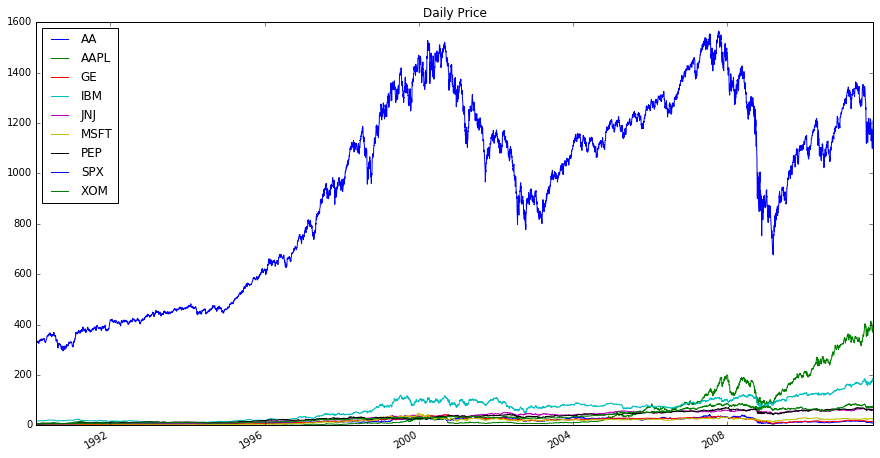

In [30]:
stock_df.plot(figsize=(15,8),title='Daily Price')

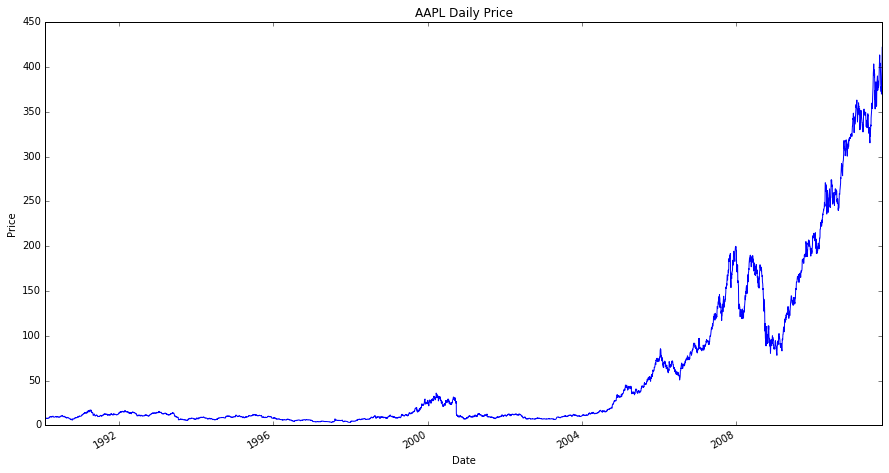

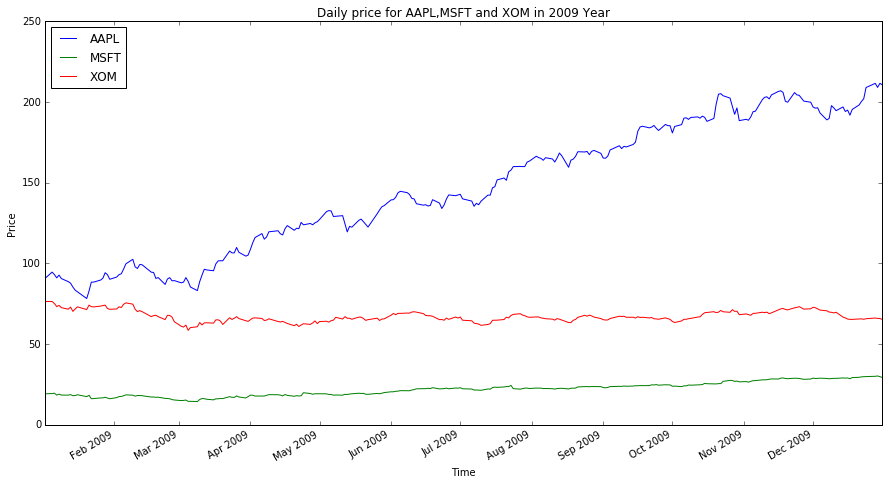

In [36]:
# select 3 companies, which are AAPL,MSFT,and XOM
part_stock_df = stock_df[['AAPL','MSFT','XOM']]

# show the daily price of AAPL
ax = plt.subplot()
part_stock_df['AAPL'].plot(figsize=(15,8),ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('AAPL Daily Price')

# show the daily price of these three companies just in 2009 year
plt.figure()
ax1 = plt.subplot()
part_stock_df.ix['2009'].plot(figsize=(15,8),ax=ax1)
ax1.set_xlabel('Time')
ax1.set_ylabel('Price')
ax1.set_title('Daily price for AAPL,MSFT and XOM in 2009 Year')

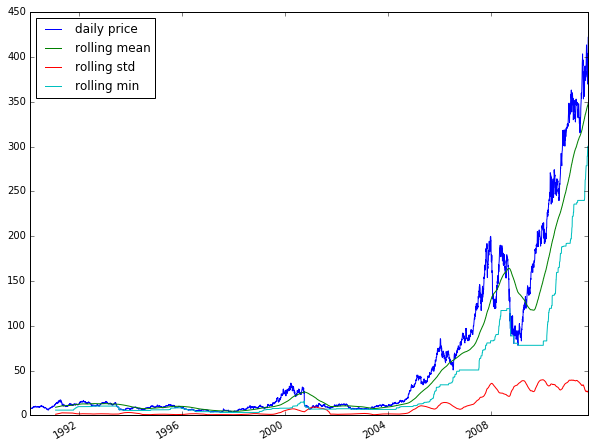

In [58]:
# Moving Window Functions
window = 250
fig = plt.figure(figsize=(10,8))
part_stock_df.AAPL.plot(label='daily price')
AAPL_rolling = part_stock_df.AAPL.rolling(window=window,center=False)
AAPL_rolling.mean().plot(label='rolling mean')
AAPL_rolling.std().plot(label='rolling std')
AAPL_rolling.min().plot(label='rolling min')
plt.legend(loc='best')

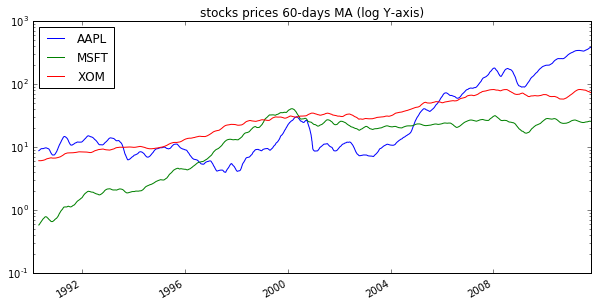

In [64]:
part_stock_df.rolling(window=60,center=False).mean().plot(logy=True,figsize=(10,5),
                                                          title='stocks prices 60-days MA (log Y-axis)')

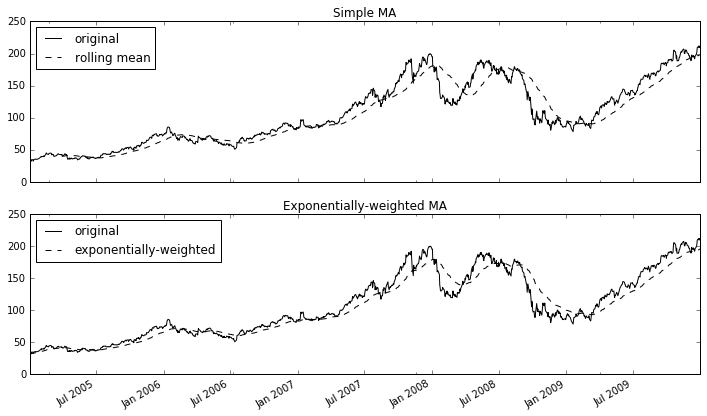

In [79]:
## Exponentially-weighted functions

fig,axes = plt.subplots(nrows = 2, ncols = 1, sharex = True, sharey = True, figsize=(12,7))

aapl_px = part_stock_df.AAPL['2005':'2009']
ma60 = aapl_px.rolling(window=60).mean()
ewma60 = aapl_px.ewm(span=60).mean()

aapl_px.plot(style='k-',ax=axes[0],label='original')
ma60.plot(style='k--',ax=axes[0],label='rolling mean')
axes[0].legend(loc='best')

aapl_px.plot(style='k-',ax=axes[1],label='original')
ewma60.plot(style='k--',ax=axes[1],label='exponentially-weighted')
axes[1].legend(loc='best')

axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')


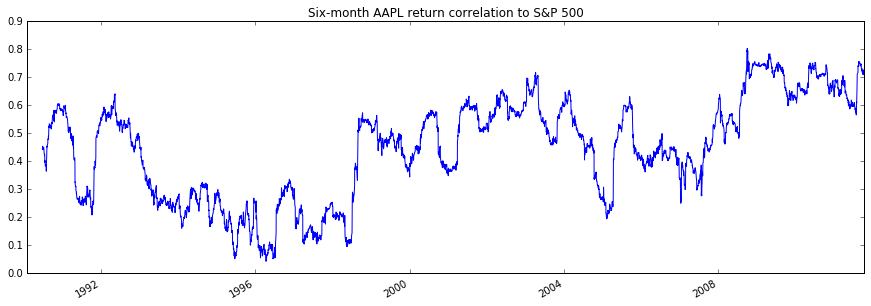

In [94]:
## Binary Moving Window Functions
spx_px = stock_df.SPX
spx_rets = spx_px / spx_px.shift(1) - 1
returns = part_stock_df.pct_change()

roll = returns.AAPL.rolling(window=125,min_periods=100)
corr = roll.corr(spx_rets)
corr.plot(figsize=(15,5),title='Six-month AAPL return correlation to S&P 500')

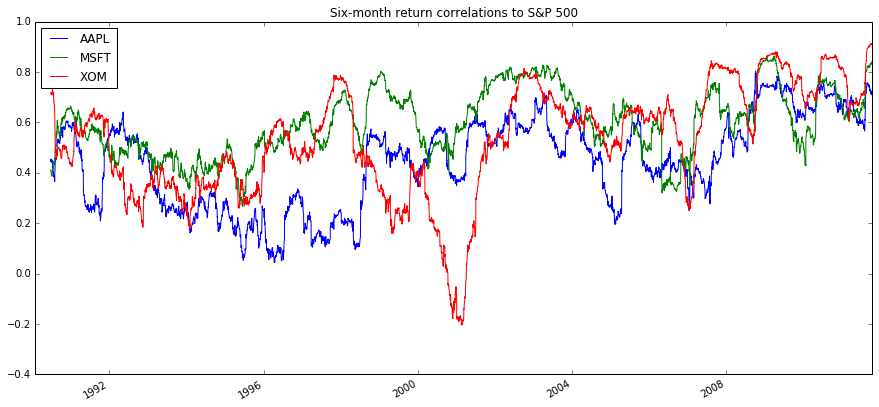

In [97]:
ret_roll = returns.rolling(window=125,min_periods=100)
ret_corr = ret_roll.corr(spx_rets)
ret_corr.plot(figsize=(15,7),title='Six-month return correlations to S&P 500')

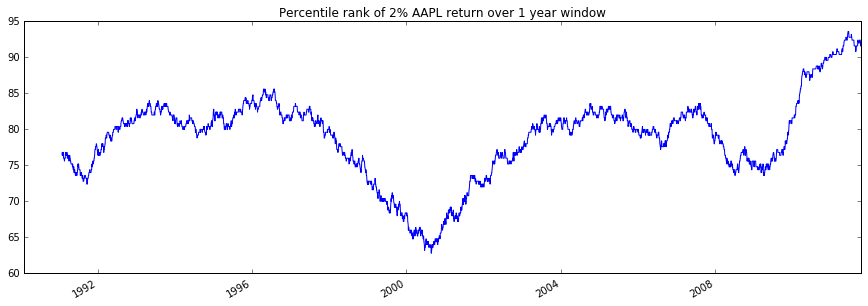

In [102]:
# User-Defined Moving Window Functions

from scipy.stats import percentileofscore

score_at_2percent = lambda x: percentileofscore(x,0.02)
result_roll = returns.AAPL.rolling(window=250)
result = result_roll.apply(score_at_2percent)
result.plot(figsize=(15,5),title='Percentile rank of 2% AAPL return over 1 year window')